In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv("datasheet.csv")

### Analysis 2:

In the following step, we prepare our predictors and outcomes for the four linear regression models. The predictor for model 1 and 2 is `death_increase_num`, and that for model 3 and 4 is `death_increase_ratio`. The outcome for model 1 and 3 is `keyword_freq`, and that for model 2 and 4 is `relative_freq`. 

In [24]:
death_increase_num = data[ ["death_increase"] ] 
data["death_increase_ratio"] = data["death_increase"] / data["positive_increase"]
death_increase_ratio = data[ ["death_increase_ratio"] ]
keyword_freq = data["covid_death_count"]
relative_freq = data["covid_death_count"] / data["covid_count"]

Then we are ready for building our models.

In [21]:
model1 = LinearRegression().fit(death_increase_num, keyword_freq)
print("Model 1:")
print("coefficient: {:.4f}".format(model1.coef_[0]))
print("intercept: {:.2f}".format(model1.intercept_))
print("R-squared value: {:.4f}".format(model1.score(death_increase_num, keyword_freq)))

Model 1:
coefficient: 0.3621
intercept: 904.25
R-squared value: 0.3542


In [27]:
model2 = LinearRegression().fit(death_increase_num, relative_freq)
print("Model 2:")
print("coefficient: {:.4f}".format(model2.coef_[0]))
print("intercept: {:.2f}".format(model2.intercept_))
print("R-squared value: {:.4f}".format(model2.score(death_increase_num, relative_freq)))

Model 2:
coefficient: 0.0000
intercept: 0.04
R-squared value: 0.2030


In [28]:
model3 = LinearRegression().fit(death_increase_ratio, keyword_freq)
print("Model 3:")
print("coefficient: {:.4f}".format(model3.coef_[0]))
print("intercept: {:.2f}".format(model3.intercept_))
print("R-squared value: {:.4f}".format(model3.score(death_increase_ratio, keyword_freq)))

Model 3:
coefficient: 7425.3966
intercept: 1013.42
R-squared value: 0.2045


In [29]:
model4 = LinearRegression().fit(death_increase_ratio, relative_freq)
print("Model 4:")
print("coefficient: {:.4f}".format(model4.coef_[0]))
print("intercept: {:.2f}".format(model4.intercept_))
print("R-squared value: {:.4f}".format(model4.score(death_increase_ratio, relative_freq)))

Model 4:
coefficient: 0.2857
intercept: 0.04
R-squared value: 0.3881


All these above models have R-squared values lower than 0.4, so we guess that there are many outliers. We want to visually demonstrate our models and raw data to confirm our guess. 

#### Ploting model 1:

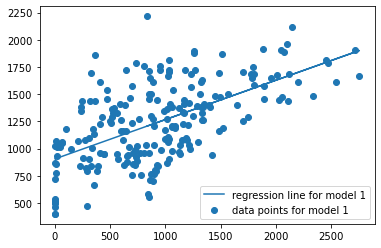

In [34]:
plt.plot( death_increase_num, model1.predict(death_increase_num), label = "regression line for model 1")
plt.scatter( x=death_increase_num, y = keyword_freq, label = "data points for model 1" )
plt.legend()
plt.show()

#### Ploting model 2:

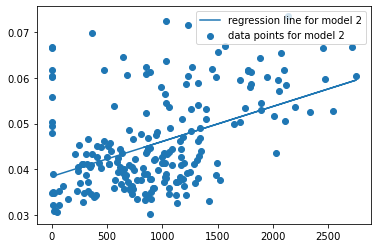

In [35]:
plt.plot( death_increase_num, model2.predict(death_increase_num), label = "regression line for model 2")
plt.scatter( x=death_increase_num, y = relative_freq, label = "data points for model 2" )
plt.legend()
plt.show()

#### Ploting model 3:

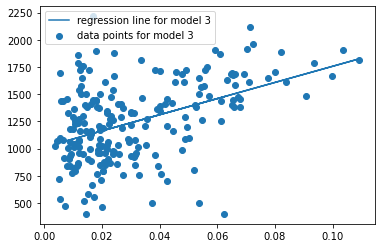

In [39]:
plt.plot( death_increase_ratio, model3.predict(death_increase_ratio), label = "regression line for model 3")
plt.scatter( x=death_increase_ratio, y = keyword_freq, label = "data points for model 3" )
plt.legend()
plt.show()

#### Ploting model 4:

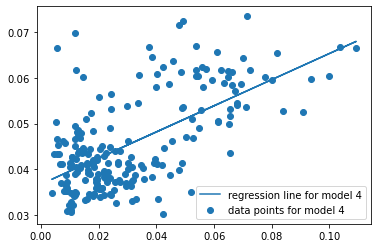

In [38]:
plt.plot( death_increase_ratio, model4.predict(death_increase_ratio), label = "regression line for model 4")
plt.scatter( x=death_increase_ratio, y = relative_freq, label = "data points for model 4" )
plt.legend()
plt.show()

Observing the above four graphs, we find that a linear regression model might not be suitable for generalizing the relationship between death cases and discussion about fatality of covid-19 on Reddit. However, we still believe that a linear regression model might be appropriate for shorter time periods, every 100 days for example

We are building linear regression models based on the first 100 days in our dataset. 

In [59]:
model = LinearRegression().fit(death_increase_num[:100], keyword_freq[:100])
print("model of first 100 days:")
print("coefficient: {:.4f}".format(model.coef_[0]))
print("intercept: {:.2f}".format(model.intercept_))
print("R-squared value: {:.4f}".format(model.score(death_increase_num[:100], keyword_freq[:100])))

model of first 100 days:
coefficient: 0.3803
intercept: 908.35
R-squared value: 0.5664


We plot this model of first 100 days. 

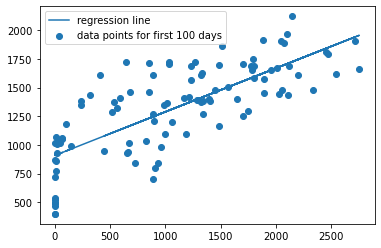

In [60]:
plt.plot( death_increase_num[:100], model.predict(death_increase_num[:100]), label = "regression line")
plt.scatter( x=death_increase_num[:100], y = keyword_freq[:100], label = "data points for first 100 days" )
plt.legend()
plt.show()

What about the next 100 days?

In [63]:
model6 = LinearRegression().fit(death_increase_num[100:200], keyword_freq[100:200])
print("model of second 100 days:")
print("coefficient: {:.4f}".format(model6.coef_[0]))
print("intercept: {:.2f}".format(model6.intercept_))
print("R-squared value: {:.4f}".format(model6.score(death_increase_num[100:200], keyword_freq[100:200])))

model of second 100 days:
coefficient: 0.1814
intercept: 1058.98
R-squared value: 0.0429


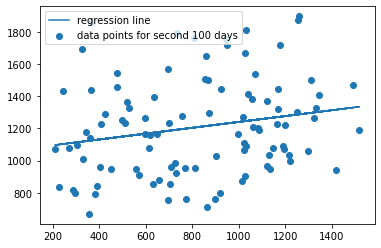

In [64]:
plt.plot( death_increase_num[100:200], model6.predict(death_increase_num[100:200]), label = "regression line")
plt.scatter( x=death_increase_num[100:200], y = keyword_freq[100:200], label = "data points for second 100 days" )
plt.legend()
plt.show()

From this, we see that the linear relationship between these two variables are not strong indeed. We can only say that there is a positive correlation between them